In [1]:
### Basic Setup

import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    import numpy as np
    
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.options.display.max_columns = None

/home/vasiliy/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/vasiliy/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/vasiliy/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/vasiliy/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
train = pd.read_csv('Kaggle_Info/train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


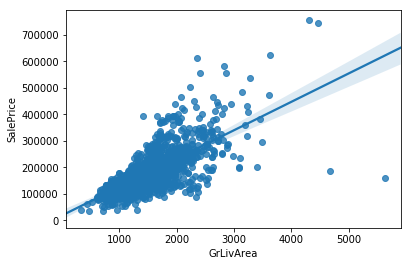

In [21]:
def cache_plot(path, clear_cache=False):
    def cache_plot_decorator(func):
        import os.path
        from IPython.display import Image
        import matplotlib.pyplot as plt
        def function_wrapper():
            if clear_cache:
                os.remove(path)
            if not os.path.isfile(path):
                func()
                plt.savefig(path, bbox_inches="tight")
                plt.close()
            return Image(filename=path)
        return function_wrapper
    return cache_plot_decorator

@cache_plot('test.png')
def draw_plot():
    sns.regplot(x='GrLivArea', y='SalePrice', data=train)

draw_plot()

In [113]:
train['BsmtQual'].value_counts(dropna=False)

TA     649
Gd     618
Ex     121
NaN     37
Fa      35
Name: BsmtQual, dtype: int64

In [114]:
ls_dummies = pd.get_dummies(train['BsmtQual'])
pd.concat([ls_dummies, train['SalePrice']], axis=1).corr()

,Ex,Fa,Gd,TA,SalePrice
Ex,1.000000,-0.047112,-0.257538,-0.268915,0.553105
Fa,-0.047112,1.000000,-0.134266,-0.140197,-0.128725
Gd,-0.257538,-0.134266,1.000000,-0.766391,0.234822
TA,-0.268915,-0.140197,-0.766391,1.000000,-0.452394
SalePrice,0.553105,-0.128725,0.234822,-0.452394,1.000000


In [115]:
ls_int = train['BsmtQual'].map({
    'Po': 1,
    'Fa': 2,
    'TA': 3,
    'Gd': 4,
    'Ex': 5
})
pd.concat([ls_int, train['SalePrice']], axis=1).corr()

,BsmtQual,SalePrice
BsmtQual,1.000000,0.644019
SalePrice,0.644019,1.000000


In [116]:
train[['OverallQual', 'OverallCond', 'SalePrice']].corr()

,OverallQual,OverallCond,SalePrice
OverallQual,1.000000,-0.091932,0.790982
OverallCond,-0.091932,1.000000,-0.077856
SalePrice,0.790982,-0.077856,1.000000


In [117]:
train['Overall_prod'] = train['OverallQual'] * train['OverallCond']
train['Overall_sum'] = train['OverallQual'] + train['OverallCond']
train[['Overall_prod', 'Overall_sum', 'SalePrice']].corr()

,Overall_prod,Overall_sum,SalePrice
Overall_prod,1.000000,0.984338,0.565294
Overall_sum,0.984338,1.000000,0.594786
SalePrice,0.565294,0.594786,1.000000


In [118]:
train['OverallCond'].value_counts(dropna=False)

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

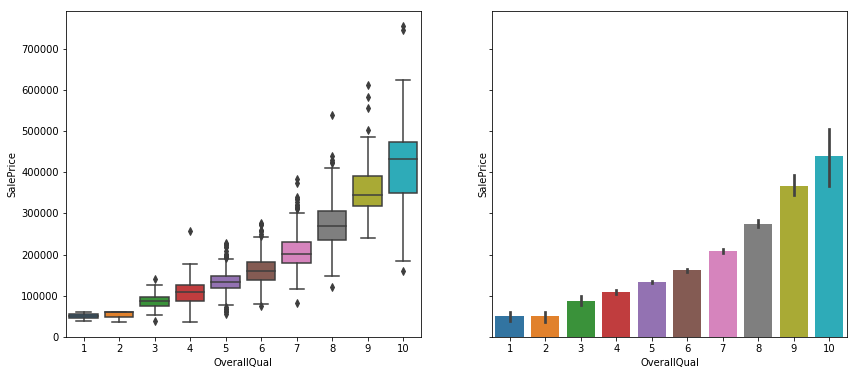

In [119]:

_, axes = plt.subplots(1, 2, sharey=True, sharex = True, figsize=(14, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=train, ax=axes[0])
sns.barplot(x='OverallQual', y='SalePrice', data=train, ax=axes[1])

In [120]:
train.corr().loc['OverallQual', 'SalePrice']

0.7909816005838047

0.8171684436128764

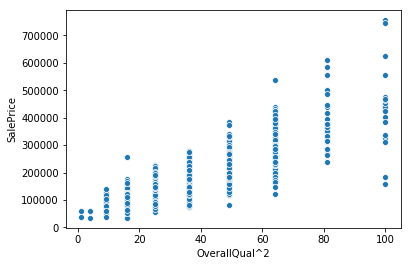

In [122]:
train['OverallQual^2'] = train['OverallQual']**2
del num_cols[num_cols.index('OverallQual')]
sns.scatterplot(x='OverallQual^2', y='SalePrice', data=train)
train.corr().loc['OverallQual^2', 'SalePrice']

In [123]:
num_cols = set(train.select_dtypes(include=np.number).columns)
num_cols -= set(['LotFrontage', 'GarageYrBlt', 'SalePrice', 'Id', 'MasVnrArea'])
num_cols = list(num_cols)

In [124]:
train[num_cols+['SalePrice']].corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual^2    0.817168
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
Overall_sum      0.594786
Overall_prod     0.565294
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
Fireplaces       0.466929
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

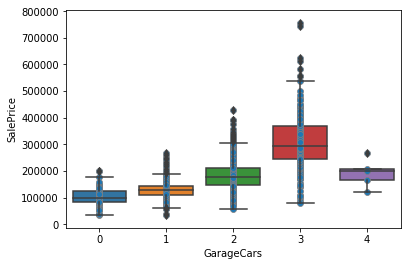

In [125]:
sns.boxplot(x='GarageCars', y='SalePrice', data=train)
sns.scatterplot(x='GarageCars', y='SalePrice', data=train, edgecolor='grey')

0.6713940935274678

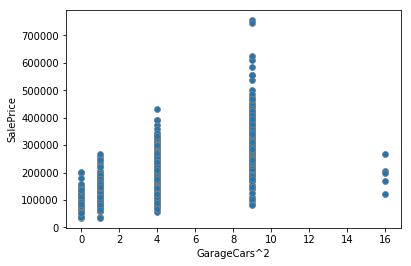

In [126]:
train['GarageCars^2'] = train['GarageCars']**2
del num_cols[num_cols.index('GarageCars')]
sns.scatterplot(x='GarageCars^2', y='SalePrice', data=train, edgecolor='grey')
train.corr().loc['GarageCars^2', 'SalePrice']

In [88]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

search = GridSearchCV(
    estimator=Lasso(),
    param_grid={
        'alpha': [.5, .6, .7, .8, .9],
    },
    cv=10,
    scoring='neg_mean_squared_error'
)
search.fit(train[num_cols], train['SalePrice'])
(search.best_params_, (-search.best_score_)**.5)

/home/vasiliy/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/vasiliy/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/vasiliy/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/vasiliy/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did no

/home/vasiliy/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/vasiliy/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/vasiliy/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/vasiliy/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did no

({'alpha': 0.9}, 34277.72876443285)

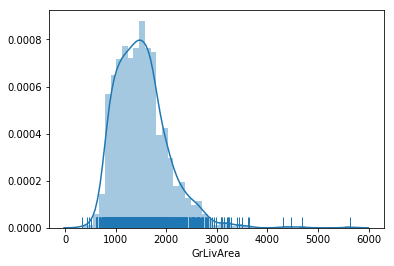

In [142]:
sns.distplot(train['GrLivArea'], rug=True)

In [127]:
lr = LinearRegression()
rmses = (-cross_val_score(lr, train[num_cols], train['SalePrice'], cv=10, scoring='neg_mean_squared_error'))**.5
rmse = np.mean(rmses)
(rmse, np.std(rmses))

(32661.2601681453, 11221.271691789127)

In [129]:
from sklearn.linear_model import Lasso

lr = Lasso(alpha=.1)
rmses = (-cross_val_score(lr, train[num_cols], train['SalePrice'], cv=10, scoring='neg_mean_squared_error'))**.5
rmse = np.mean(rmses)
(rmse, np.std(rmses))

/home/vasiliy/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/vasiliy/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/vasiliy/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/vasiliy/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did no

(32661.175626203498, 11221.31067835265)

In [135]:
lr = RandomForestRegressor()
rmses = (-cross_val_score(lr, train[num_cols], train['SalePrice'], cv=10, scoring='neg_mean_squared_error'))**.5
rmse = np.mean(rmses)
(rmse, np.std(rmses))

(30885.522980012116, 6555.4960617067145)